In [1]:
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import ticker
from scipy.stats import lognorm,cumfreq
from scipy.stats import norm

## Loading building data

In [2]:
df_build_fac = geopandas.read_file('DATA/bld_sc/bldPort_TV0_siteclasses.shp')

## Loading policy assessment results

In [3]:
di_nop=np.load('output_files/Di_nop.npy')   
di_p1=np.load('output_files/Di_policy1.npy')   
di_p2=np.load('output_files/Di_policy2.npy')   
di_p3=np.load('output_files/Di_policy3.npy')   
di_p4=np.load('output_files/Di_policy4.npy')   
di_p5=np.load('output_files/Di_policy5.npy')   
benefit1=np.load(f'output_files/delta_all.npy')
benefit2=np.load(f'output_files/delta_low.npy')
costbenefit1=np.load(f'output_files/bcr_all.npy')
costbenefit2=np.load(f'output_files/bcr_low.npy')

## Plotting $F(D_i)$ (i.e., emprical CDF of $D_i$)

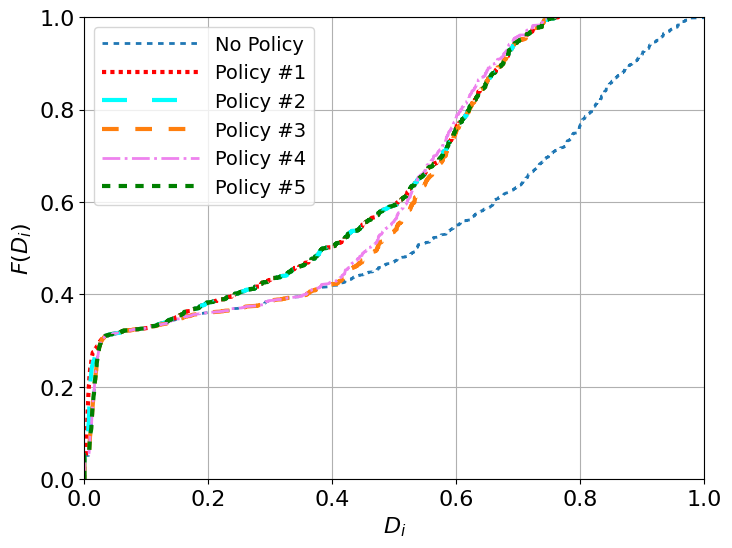

In [4]:
fig=plt.figure(figsize=(8,6))

di_nop_sort=np.sort(di_nop)
di_p1_sort=np.sort(di_p1)
di_p2_sort=np.sort(di_p2)
di_p3_sort=np.sort(di_p3)
di_p4_sort=np.sort(di_p4)
di_p5_sort=np.sort(di_p5)

ecdfnop = np.arange(0, len(di_nop_sort)) / (len(di_nop_sort)-1)
ecdfp1 = np.arange(0, len(di_p1_sort)) / (len(di_p1_sort)-1)
ecdfp2 = np.arange(0, len(di_p2_sort)) / (len(di_p2_sort)-1)
ecdfp3 = np.arange(0, len(di_p3_sort)) / (len(di_p3_sort)-1)
ecdfp4 = np.arange(0, len(di_p4_sort)) / (len(di_p4_sort)-1)
ecdfp5 = np.arange(0, len(di_p5_sort)) / (len(di_p5_sort)-1)


plt.plot(di_nop_sort, ecdfnop,label='No Policy',dashes=[2,2],linewidth=2)
plt.plot(di_p1_sort, ecdfp1,label='Policy #1',dashes=[1,1],c='red',linewidth=3)
plt.plot(di_p2_sort, ecdfp2,label='Policy #2',linewidth=3,linestyle='--',dashes=[6,6],c='cyan')#
plt.plot(di_p3_sort, ecdfp3,label='Policy #3',dashes=[4,4],linewidth=3)
plt.plot(di_p4_sort, ecdfp4,label='Policy #4',c='violet',linewidth=2,linestyle='dashdot')
plt.plot(di_p5_sort, ecdfp5,label='Policy #5',dashes=[2,2],linewidth=3,c='green')

plt.xlabel(r'$D_i$',fontsize=16)
plt.ylabel(r'$F(D_i)$',fontsize=16)
plt.xlim((0.0,1.0))
plt.ylim((0.0,1.0))
plt.legend(handlelength=5,fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()


## Plotting $F(D_i)$ for individual site classes

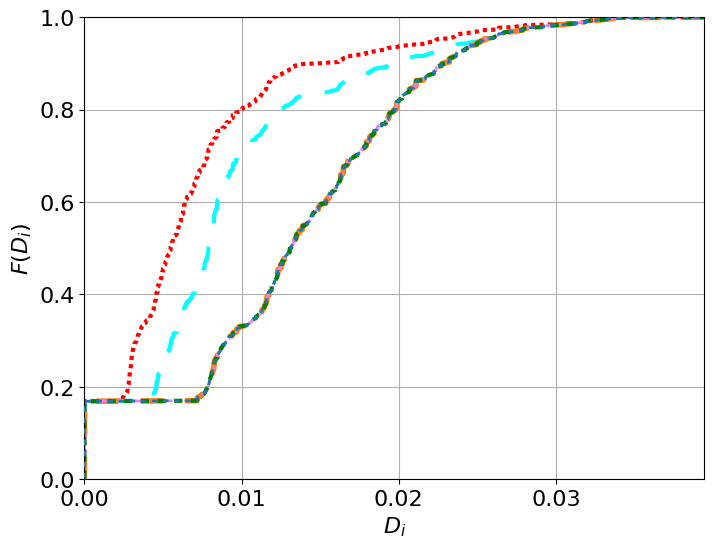

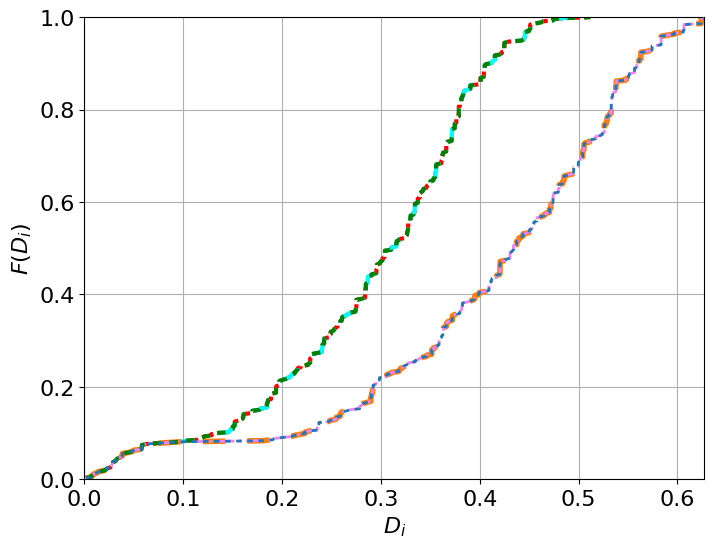

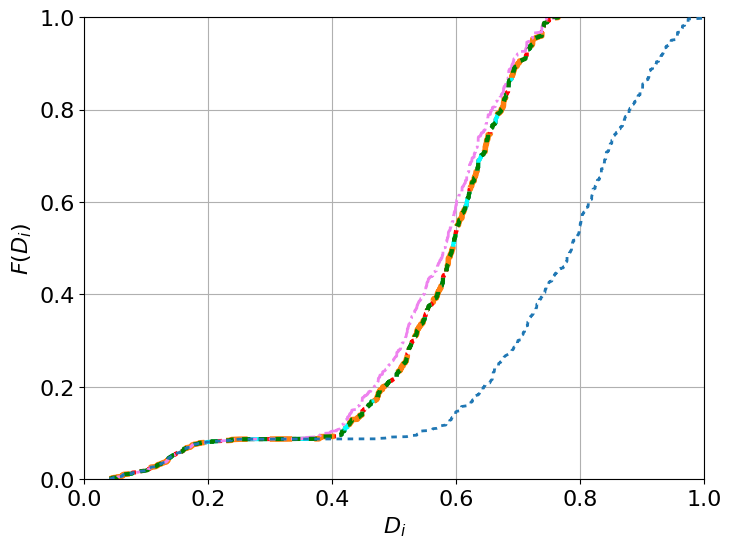

In [5]:

for siteclust in [0,1,2]:
    ## Calculating ECDF for individual site classes
    site_nop = np.sort(di_nop[df_build_fac['cluster']==siteclust])
    ecdfs1_nop = np.arange(1, len(site_nop) + 1) / len(site_nop)

    site_p1 = np.sort(di_p1[df_build_fac['cluster']==siteclust])
    ecdfs1_p1 = np.arange(1, len(site_p1) + 1) / len(site_p1)

    site_p2 = np.sort(di_p2[df_build_fac['cluster']==siteclust])
    ecdfs1_p2 = np.arange(1, len(site_p2) + 1) / len(site_p2)

    site_p3 = np.sort(di_p3[df_build_fac['cluster']==siteclust])
    ecdfs1_p3 = np.arange(1, len(site_p3) + 1) / len(site_p3)

    site_p4 = np.sort(di_p4[df_build_fac['cluster']==siteclust])
    ecdfs1_p4 = np.arange(1, len(site_p4) + 1) / len(site_p4)

    site_p5 = np.sort(di_p5[df_build_fac['cluster']==siteclust])
    ecdfs1_p5 = np.arange(1, len(site_p5) + 1) / len(site_p5)
   
    ## Plotting
    fig,ax=plt.subplots(figsize=(8,6))
    ax.plot(site_nop, ecdfs1_nop,label='No Policy',dashes=[2,2],linewidth=2,zorder=200)
    ax.plot(site_p1, ecdfs1_p1,label='Policy #1',dashes=[1,1],c='red',linewidth=3)
    ax.plot(site_p2, ecdfs1_p2,label='Policy #2',linewidth=3,linestyle='--',dashes=[6,6],c='cyan')#
    ax.plot(site_p3, ecdfs1_p3,label='Policy #3',dashes=[4,4],linewidth=4)
    ax.plot(site_p4, ecdfs1_p4,label='Policy #4',c='violet',linewidth=2,linestyle='dashdot')
    ax.plot(site_p5, ecdfs1_p5,label='Policy #5',dashes=[2,2],linewidth=3,c='green')

    ax.set_xlabel(r'$D_i$',fontsize=16)
    ax.set_ylabel(r'$F(D_i)$',fontsize=16)
    
    ax.set_ylim((0.0,1.0))
    if siteclust==0:
        ax.xaxis.set_major_locator(ticker.FixedLocator([0.0,0.01,0.02,0.03,0.04]))
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
        
    elif siteclust==1:
        ax.xaxis.set_major_locator(ticker.FixedLocator([0.0,0.1,0.2,0.3,0.4,0.5,0.6]))
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    else:
        ax.set_xlim((0.0,1.0))
        
    ax.set_xlim((0.0,np.max(di_nop[df_build_fac['cluster']==siteclust])))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    

## Plotting $F(D_i)$ and $F(D_{low})$ for each policy intervention

In [6]:
#Calculating ecdf for buildings in the low-income zone for each policy intervention
di_li_nop_sort=np.sort(di_nop[df_build_fac['polytype']=='lowIncome'])
di_li_p1_sort=np.sort(di_p1[df_build_fac['polytype']=='lowIncome'])
di_li_p2_sort=np.sort(di_p2[df_build_fac['polytype']=='lowIncome'])
di_li_p3_sort=np.sort(di_p3[df_build_fac['polytype']=='lowIncome'])
di_li_p4_sort=np.sort(di_p4[df_build_fac['polytype']=='lowIncome'])
di_li_p5_sort=np.sort(di_p5[df_build_fac['polytype']=='lowIncome'])

ecdflinop = np.arange(0, len(di_li_nop_sort)) / (len(di_li_nop_sort)-1)
ecdflip1 = np.arange(0, len(di_li_p1_sort)) / (len(di_li_p1_sort)-1)
ecdflip2 = np.arange(0, len(di_li_p2_sort)) / (len(di_li_p2_sort)-1)
ecdflip3 = np.arange(0, len(di_li_p3_sort)) / (len(di_li_p3_sort)-1)
ecdflip4 = np.arange(0, len(di_li_p4_sort)) / (len(di_li_p4_sort)-1)
ecdflip5 = np.arange(0, len(di_li_p5_sort)) / (len(di_li_p5_sort)-1)


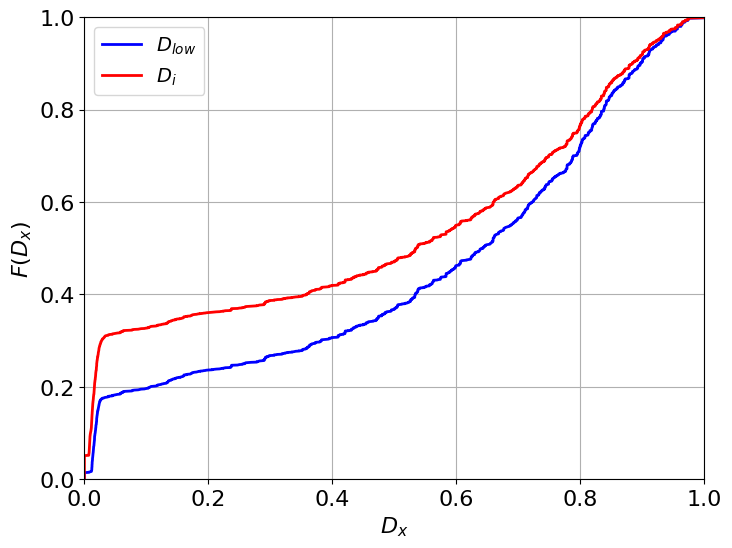

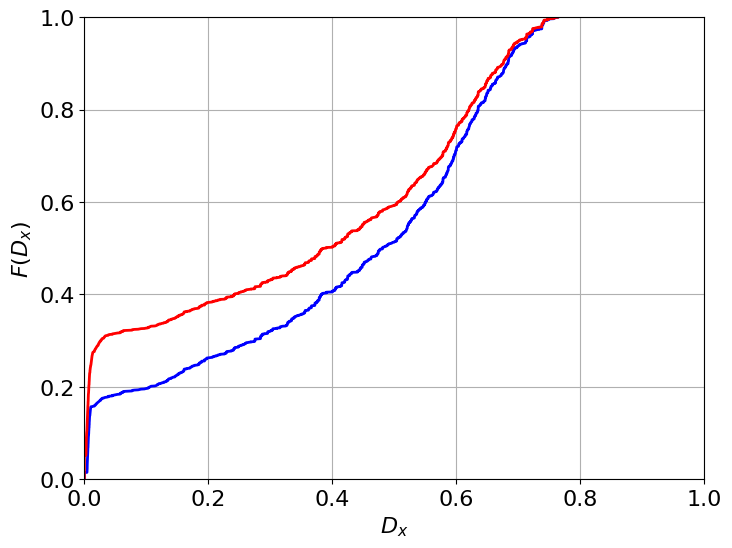

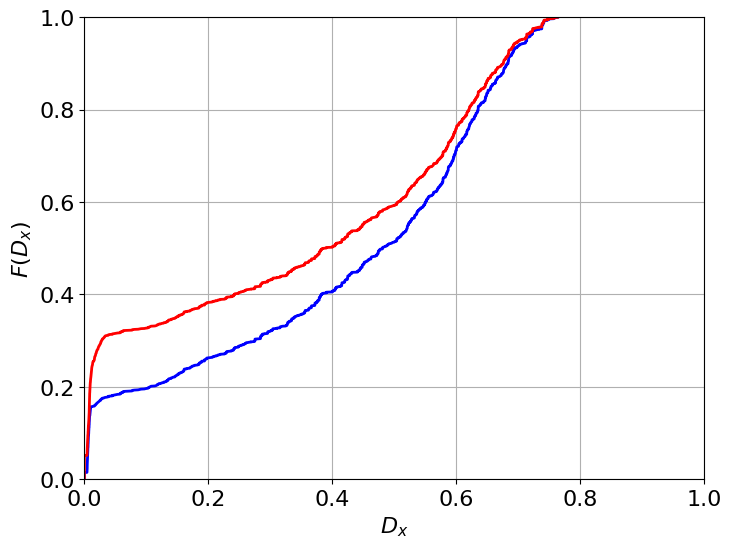

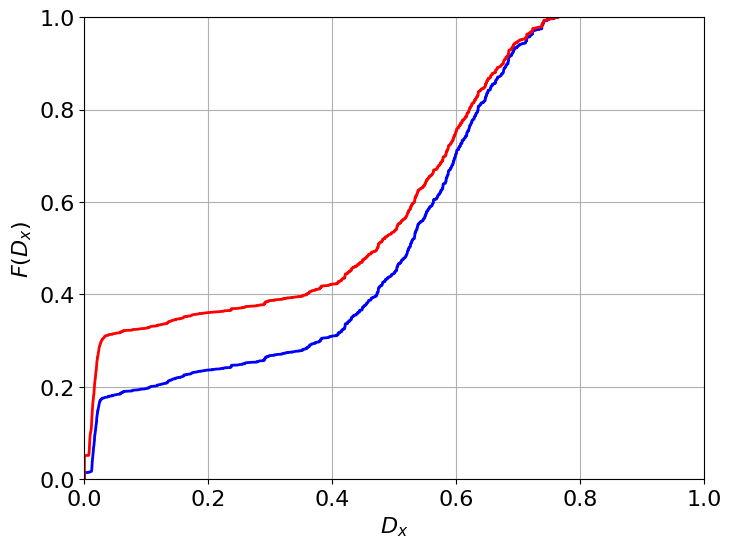

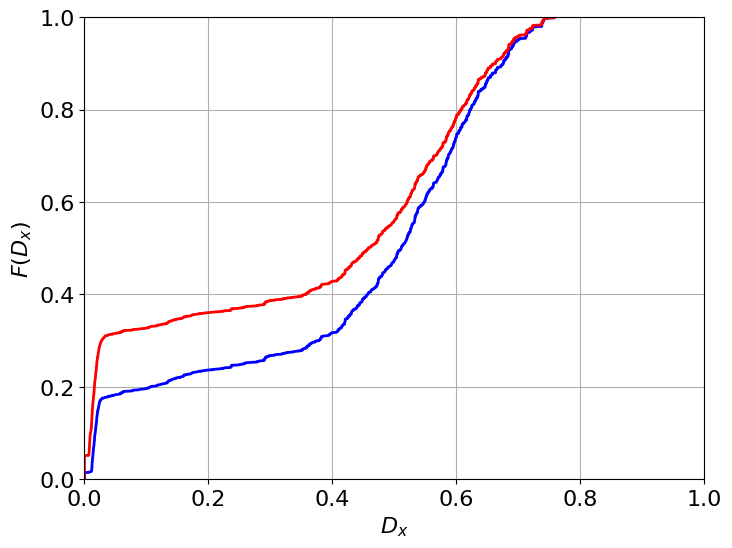

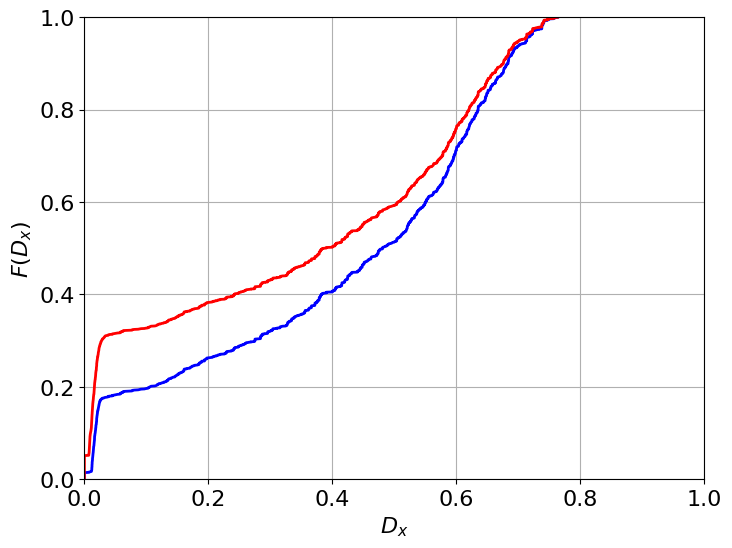

In [7]:
#merging ecdf arrays
diliplot=[di_li_nop_sort,di_li_p1_sort,di_li_p2_sort,di_li_p3_sort,di_li_p4_sort,di_li_p5_sort]
ecdfliplot=[ecdflinop,ecdflip1,ecdflip2,ecdflip3,ecdflip4,ecdflip5]
diplot=[di_nop_sort,di_p1_sort,di_p2_sort,di_p3_sort,di_p4_sort,di_p5_sort]
ecdfplot=[ecdfnop,ecdfp1,ecdfp2,ecdfp3,ecdfp4,ecdfp5]

fs=16

for i in range(6):
    fig=plt.figure(figsize=(8,6))
    plt.plot(diliplot[i], ecdfliplot[i],label=r'$D_{low}$',color='blue',linewidth=2)
    plt.plot(diplot[i], ecdfplot[i],label=r'$D_i$',c='red',linewidth=2)
    plt.xlabel(r'$D_x$',fontsize=fs)
    plt.ylabel(r'$F(D_x)$',fontsize=fs)
    plt.xlim((0.0,1.0))
    plt.ylim((0.0,1.0))
    if i==0:
        plt.legend(handlelength=2,fontsize=fs-2)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.grid()

## Plotting Cost-benefit analysis (CBA) results

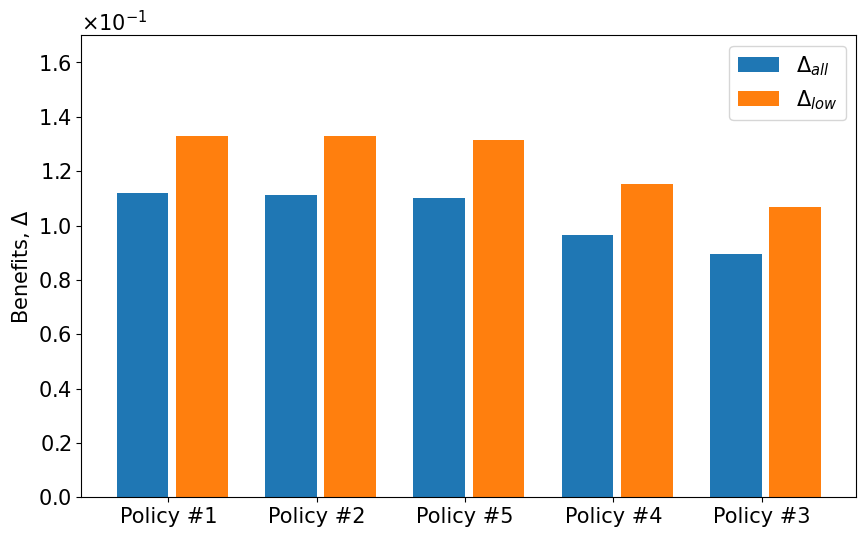

In [8]:
benefit1sort=np.sort(benefit1)[::-1]
bfargs=np.argsort(benefit1)[::-1]
benefit2sort=np.sort(benefit2)[::-1]
num_policies = len(benefit1)
policy_labels = np.array([f'Policy #{i+1}' for i in range(num_policies)])
policy_labelsort=policy_labels[bfargs]

bar_width = 0.35
buffer=0.05
index = np.arange(num_policies)
plt.rc('font',size=15)

fig,ax=plt.subplots(figsize=(10,6))
bar1 = ax.bar(index, benefit1sort, bar_width, label=r'$\Delta_{all}$')
bar2 = ax.bar(index + bar_width+buffer, benefit2sort, bar_width, label=r'$\Delta_{low}$')
ax.set_ylabel(r'Benefits, $\Delta$')
ax.set_ylim(0,0.17)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(policy_labelsort)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
ax.legend()


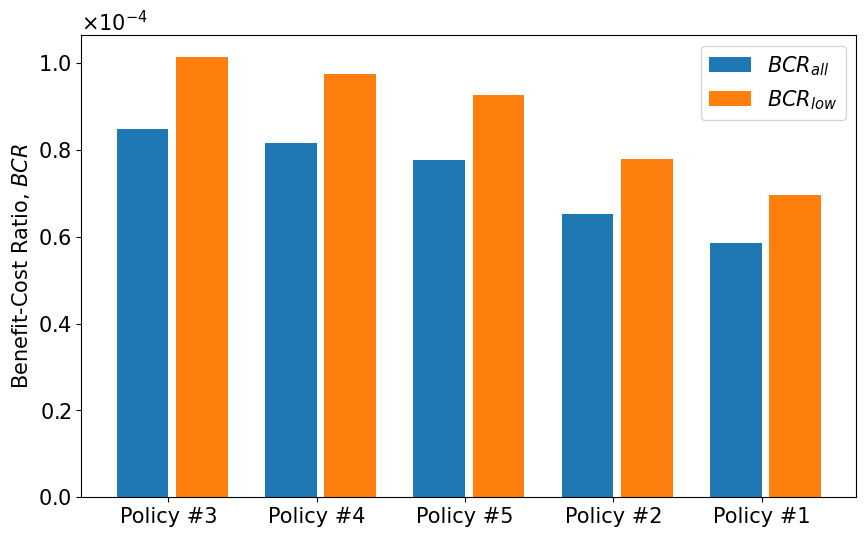

In [9]:
costbenefit1sort=np.sort(costbenefit1)[::-1]
bcrargs=np.argsort(costbenefit1)[::-1]
costbenefit2sort=np.sort(costbenefit2)[::-1]
num_policies = len(costbenefit1)
policy_labels = np.array([f'Policy #{i+1}' for i in range(num_policies)])
policy_labelsort=policy_labels[bcrargs]

bar_width = 0.35
buffer=0.05
index = np.arange(num_policies)

fig,ax=plt.subplots(figsize=(10,6))
bar1 = ax.bar(index, costbenefit1sort, bar_width, label=r'$BCR_{all}$')
bar2 = ax.bar(index + bar_width+buffer, costbenefit2sort, bar_width, label=r'$BCR_{low}$')
ax.set_ylabel(r'Benefit-Cost Ratio, $BCR$')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(policy_labelsort)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
ax.legend()
